# Esplorazione

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('superconductors.csv')

In [3]:
df.head()

number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0                   4         88.944468             57.862692   
1                   5         92.729214             58.518416   
2                   4         88.944468             57.885242   
3                   4         88.944468             57.873967   
4                   4         88.944468             57.840143   

   gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
0          66.361592              36.116612             1.181795   
1          73.132787              36.396602             1.449309   
2          66.361592              36.122509             1.181795   
3          66.361592              36.119560             1.181795   
4          66.361592              36.110716             1.181795   

   wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  \
0                 1.062396          122.90607              31.794921   
1                 1.057755          122.90607              36.161939   
2                 0.975980          122.90607              35.741099   
3                 1.022291          122.90607              33.768010   
4                 1.129224          122.90607              27.848743   

   std_atomic_mass  ...  wtd_mean_Valence  gmean_Valence  wtd_gmean_Valence  \
0        51.968828  ...          2.257143       2.213364           2.219783   
1        47.094633  ...          2.257143       1.888175           2.210679   
2        51.968828  ...          2.271429       2.213364           2.232679   
3        51.968828  ...          2.264286       2.213364           2.226222   
4        51.968828  ...          2.242857       2.213364           2.206963   

   entropy_Valence  wtd_entropy_Valence  range_Valence  wtd_range_Valence  \
0         1.368922             1.066221              1           1.085714   
1         1.557113             1.047221              2           1.128571   
2         1.368922             1.029175              1           1.114286   
3         1.368922             1.048834              1           1.100000   
4         1.368922             1.096052              1           1.057143   

   std_Valence  wtd_std_Valence  critical_temp  
0     0.433013         0.437059           29.0  
1     0.632456         0.468606           26.0  
2     0.433013         0.444697           19.0  
3     0.433013         0.440952           22.0  
4     0.433013         0.428809           23.0  

[5 rows x 82 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               21263 non-null  int64  
 1   mean_atomic_mass                 21263 non-null  float64
 2   wtd_mean_atomic_mass             21263 non-null  float64
 3   gmean_atomic_mass                21263 non-null  float64
 4   wtd_gmean_atomic_mass            21263 non-null  float64
 5   entropy_atomic_mass              21263 non-null  float64
 6   wtd_entropy_atomic_mass          21263 non-null  float64
 7   range_atomic_mass                21263 non-null  float64
 8   wtd_range_atomic_mass            21263 non-null  float64
 9   std_atomic_mass                  21263 non-null  float64
 10  wtd_std_atomic_mass              21263 non-null  float64
 11  mean_fie                         21263 non-null  float64
 12  wtd_mean_fie      

In [5]:
df.isnull().sum().sort_values()

number_of_elements         0
wtd_range_FusionHeat       0
range_FusionHeat           0
wtd_entropy_FusionHeat     0
entropy_FusionHeat         0
                          ..
wtd_gmean_atomic_radius    0
gmean_atomic_radius        0
wtd_mean_atomic_radius     0
wtd_std_fie                0
critical_temp              0
Length: 82, dtype: int64

In [6]:
df.drop_duplicates(subset=None, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21197 entries, 0 to 21262
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               21197 non-null  int64  
 1   mean_atomic_mass                 21197 non-null  float64
 2   wtd_mean_atomic_mass             21197 non-null  float64
 3   gmean_atomic_mass                21197 non-null  float64
 4   wtd_gmean_atomic_mass            21197 non-null  float64
 5   entropy_atomic_mass              21197 non-null  float64
 6   wtd_entropy_atomic_mass          21197 non-null  float64
 7   range_atomic_mass                21197 non-null  float64
 8   wtd_range_atomic_mass            21197 non-null  float64
 9   std_atomic_mass                  21197 non-null  float64
 10  wtd_std_atomic_mass              21197 non-null  float64
 11  mean_fie                         21197 non-null  float64
 12  wtd_mean_fie      

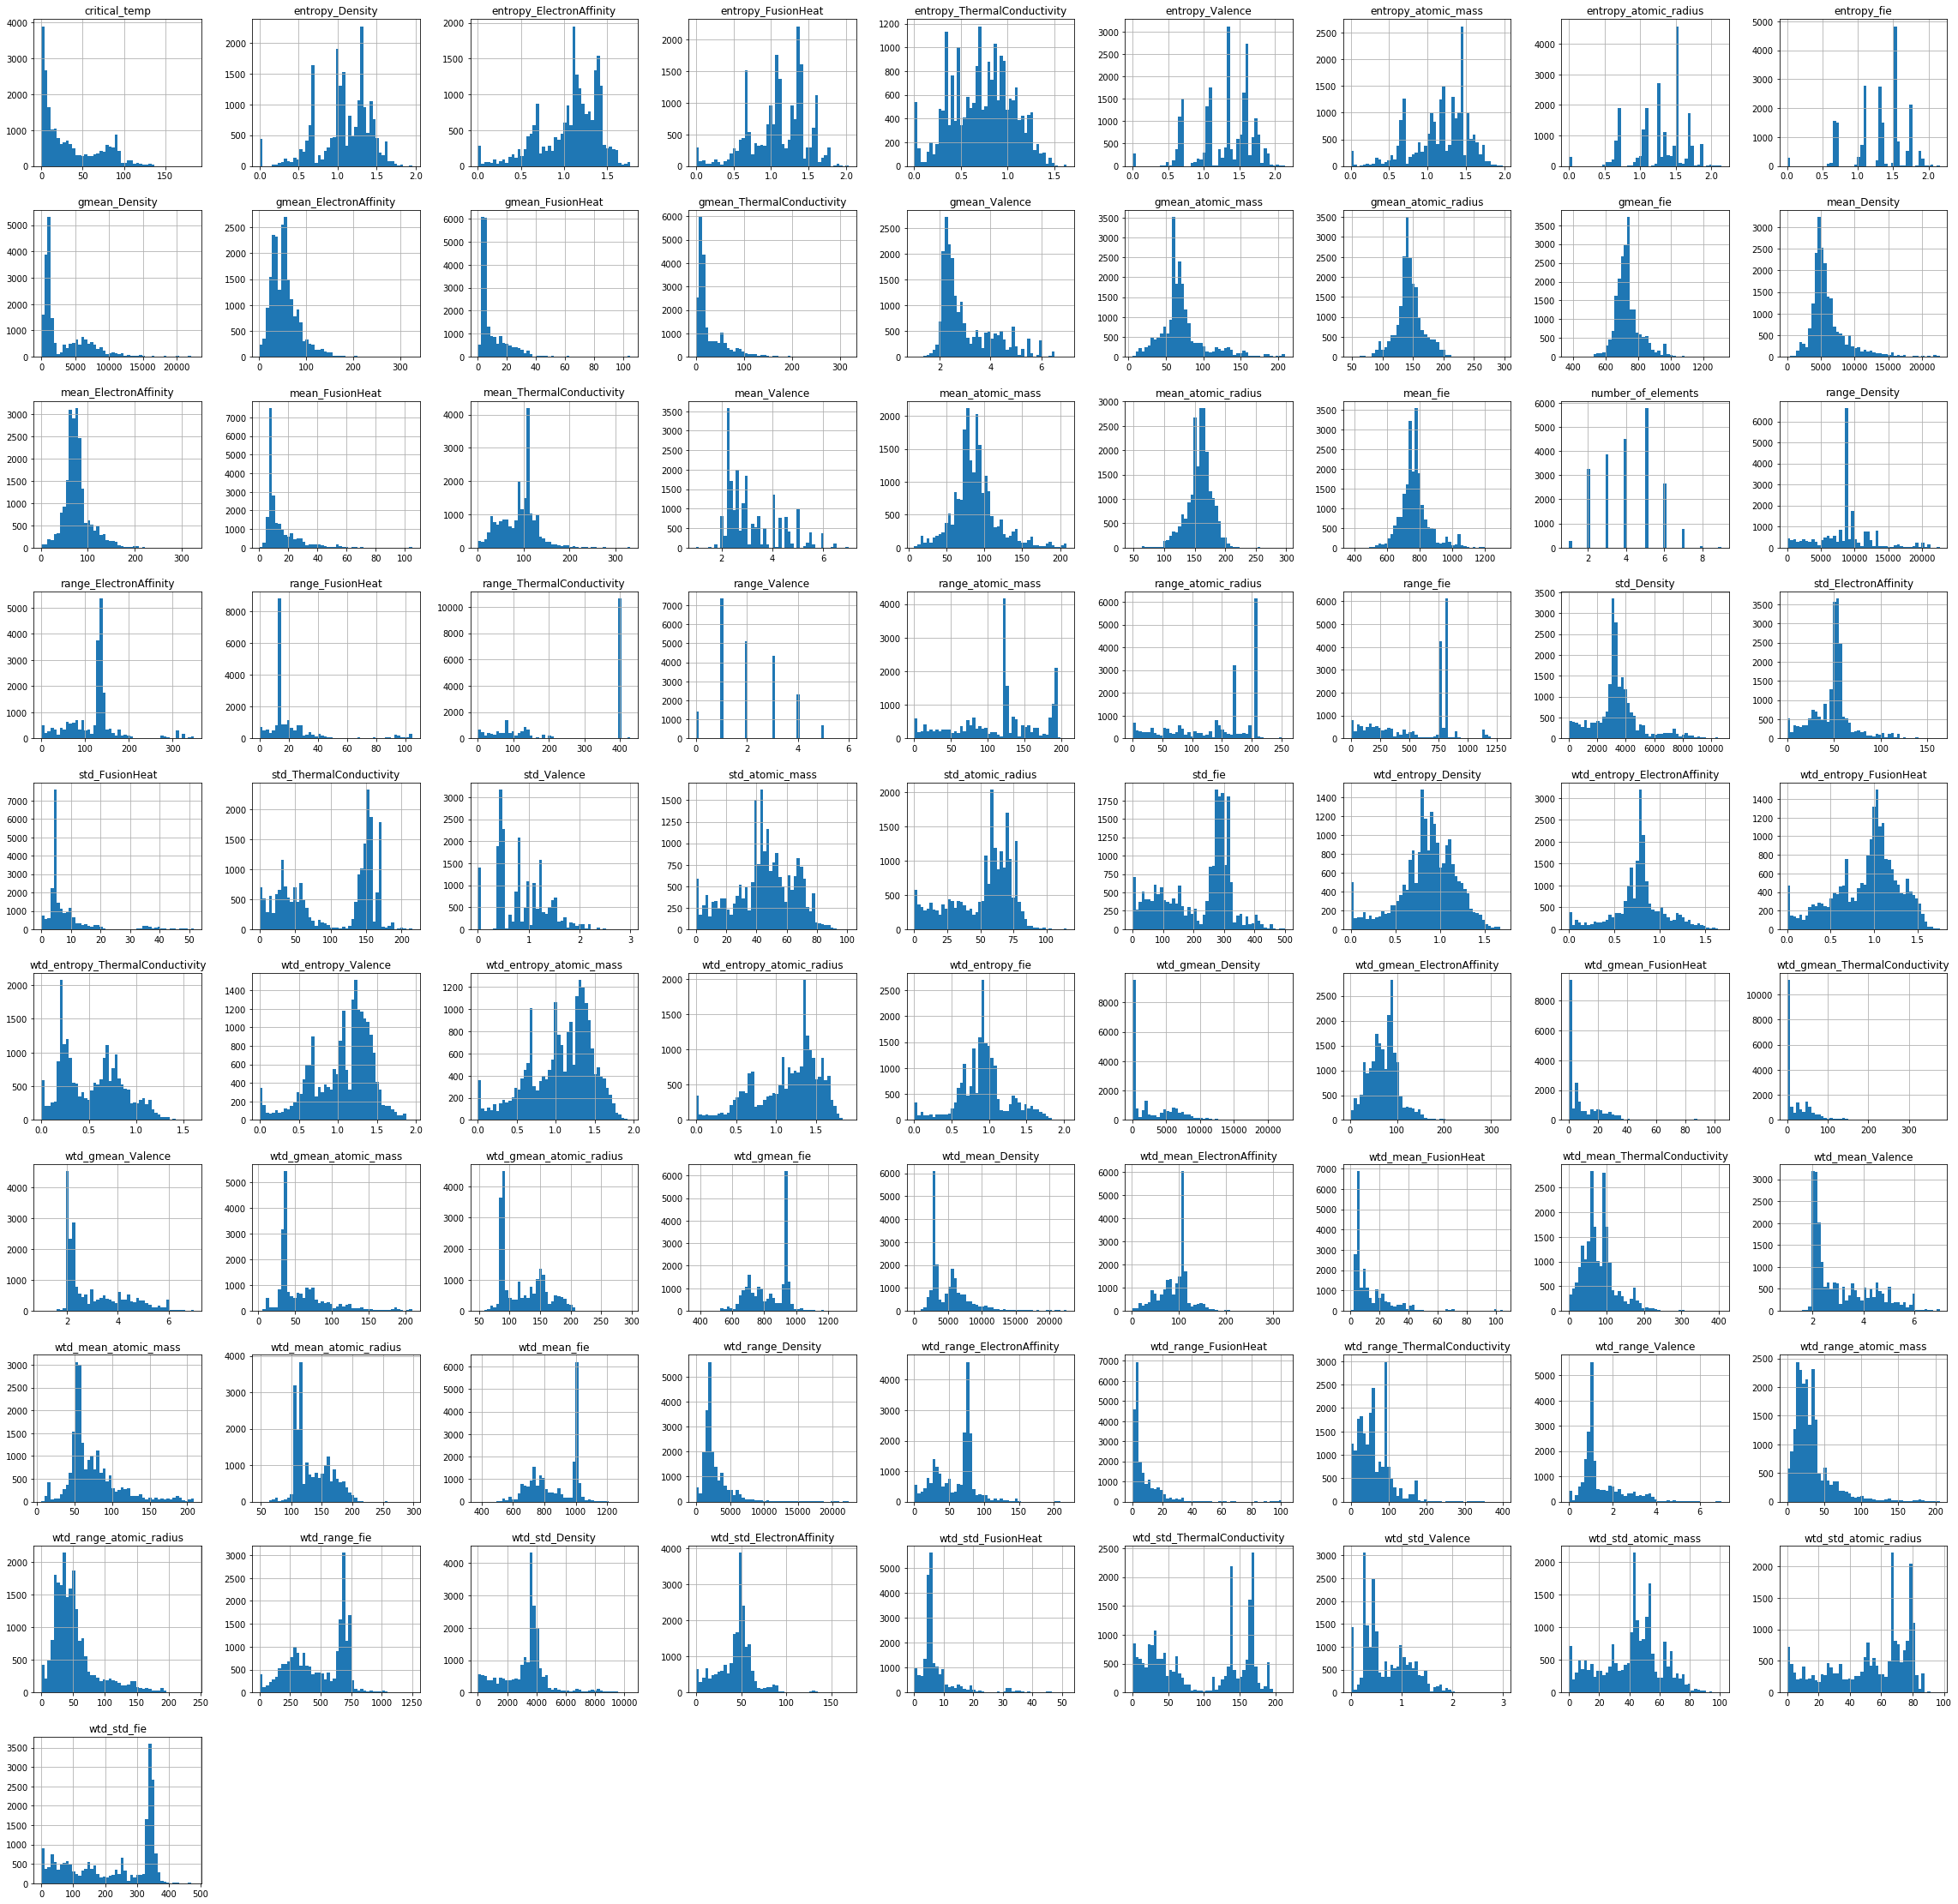

In [7]:
df.hist(bins=50,figsize=(40,40))
plt.show()

## Scaling delle features

In [8]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
x_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(x_scaled, columns=list(df.columns))


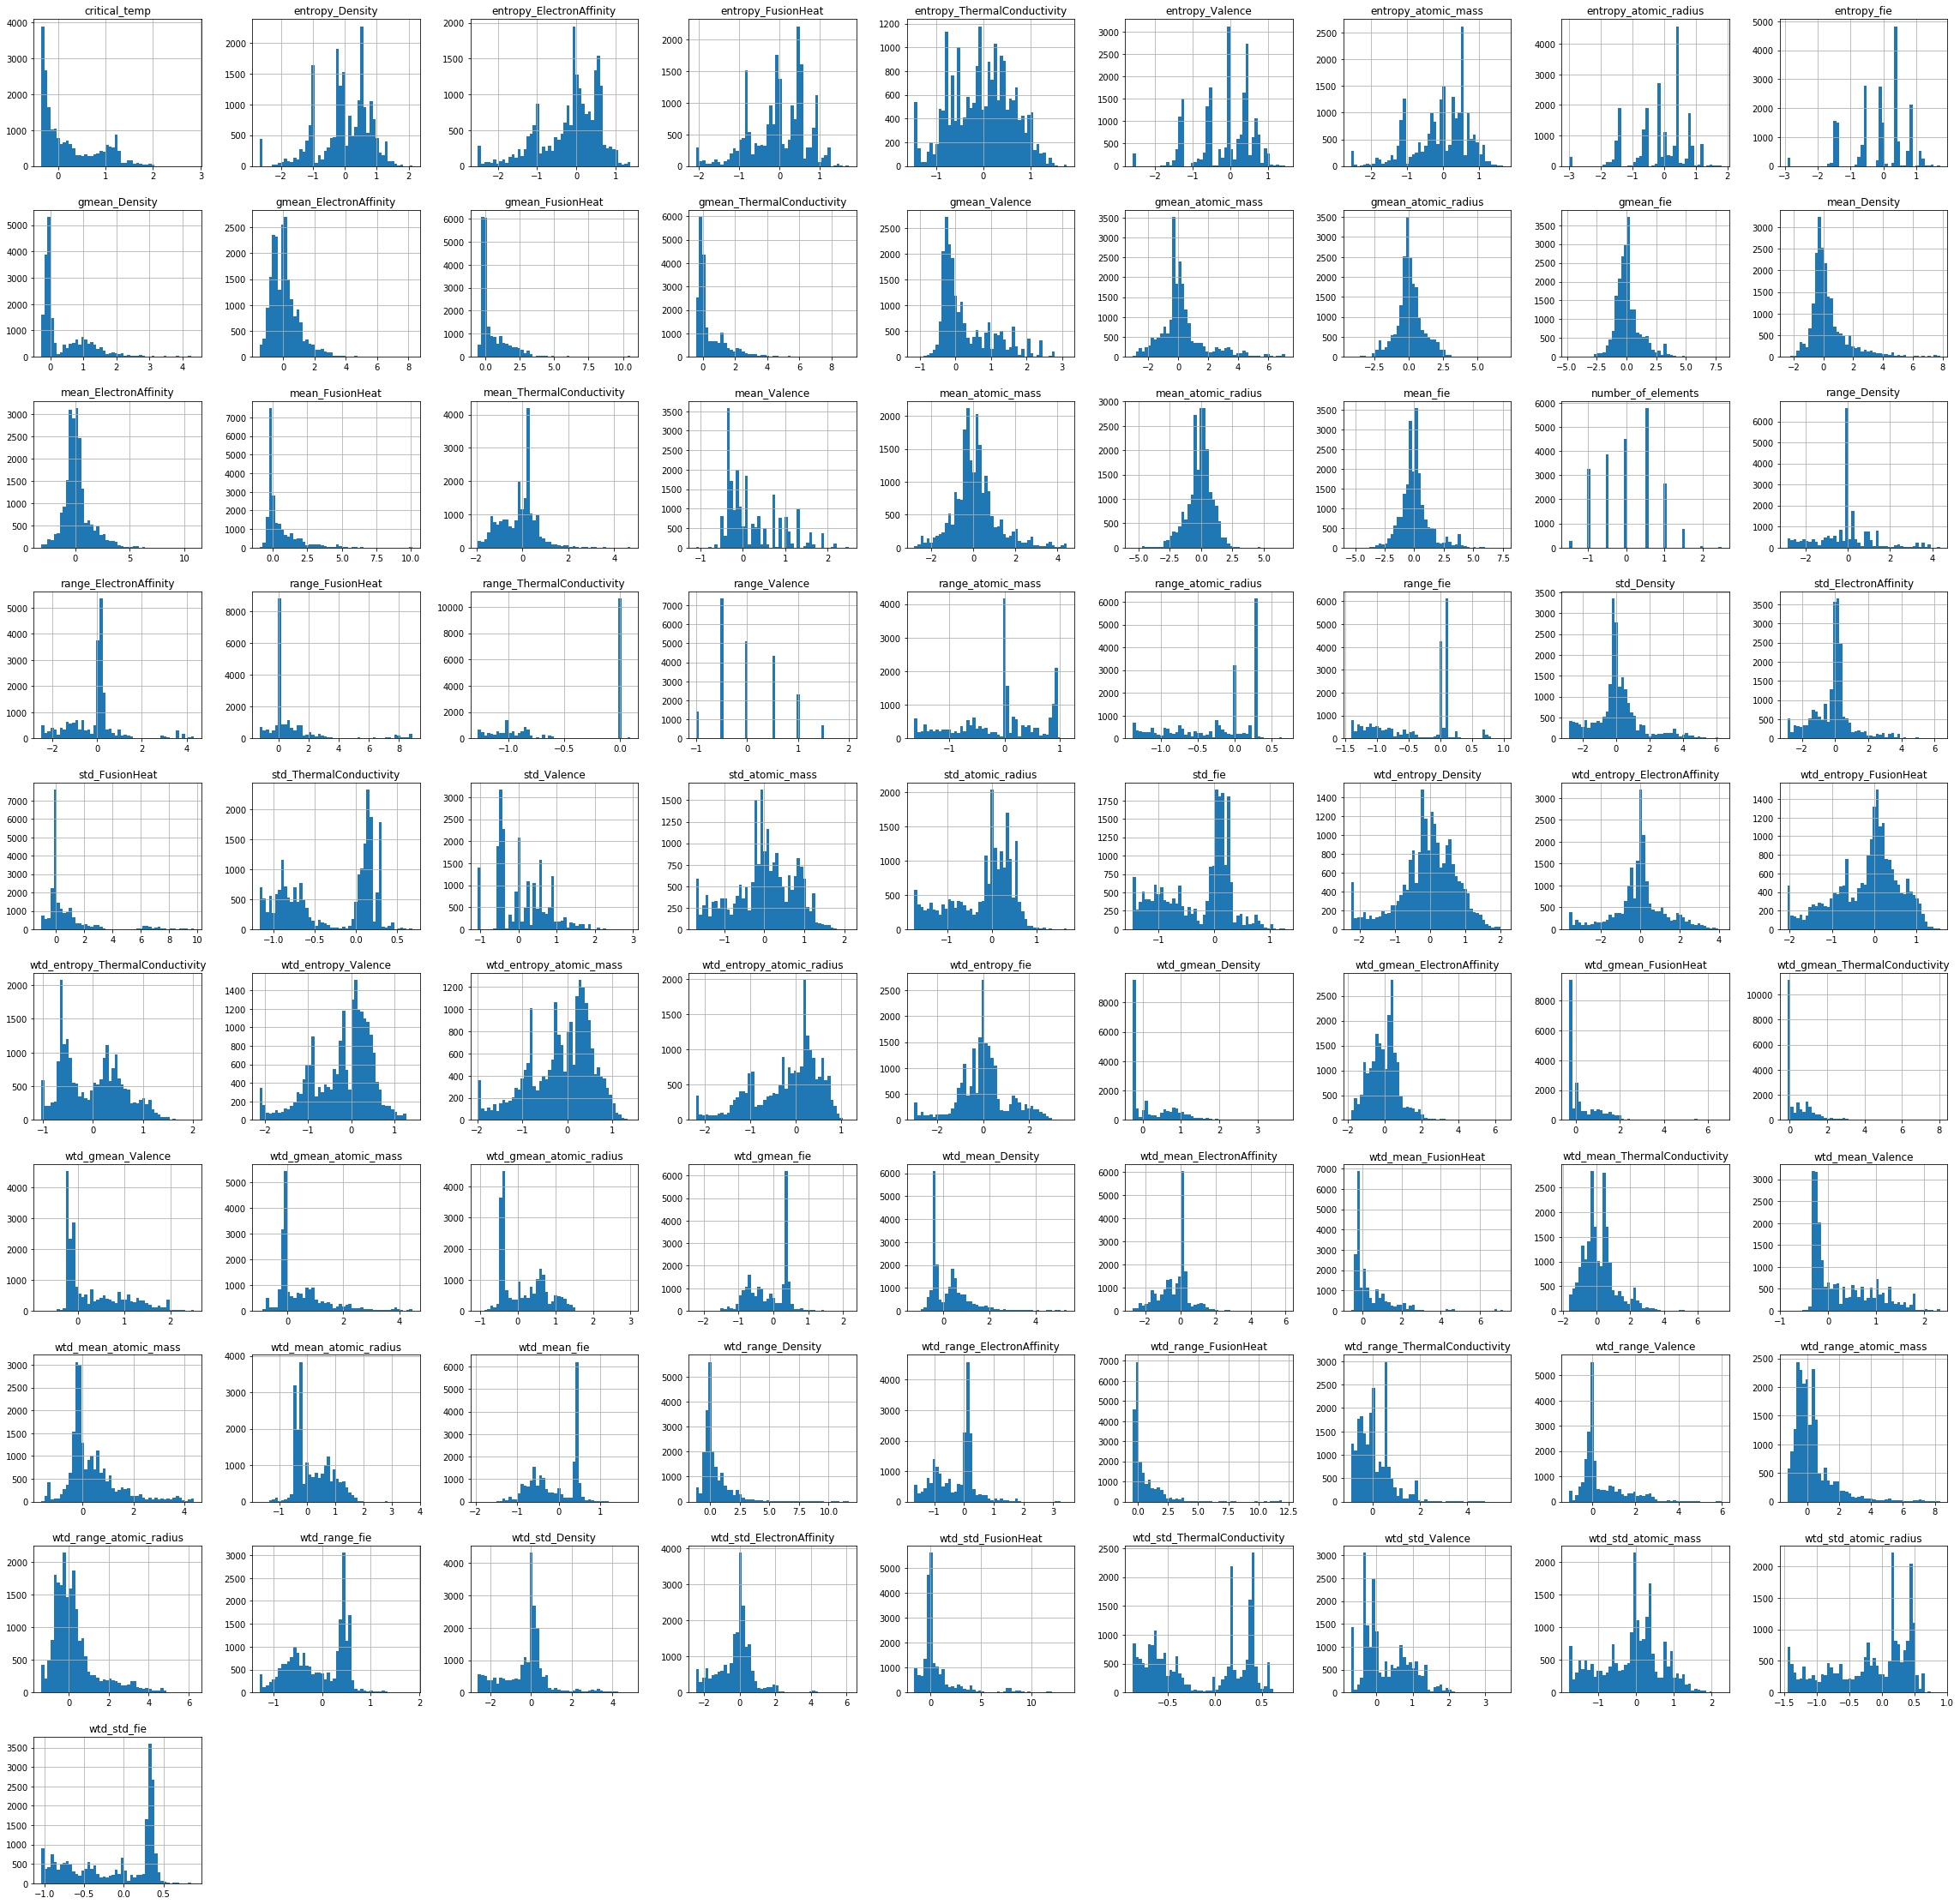

In [9]:
df_scaled.hist(bins=50,figsize=(40,40))
plt.show()

In [10]:
cor = df_scaled.corr()

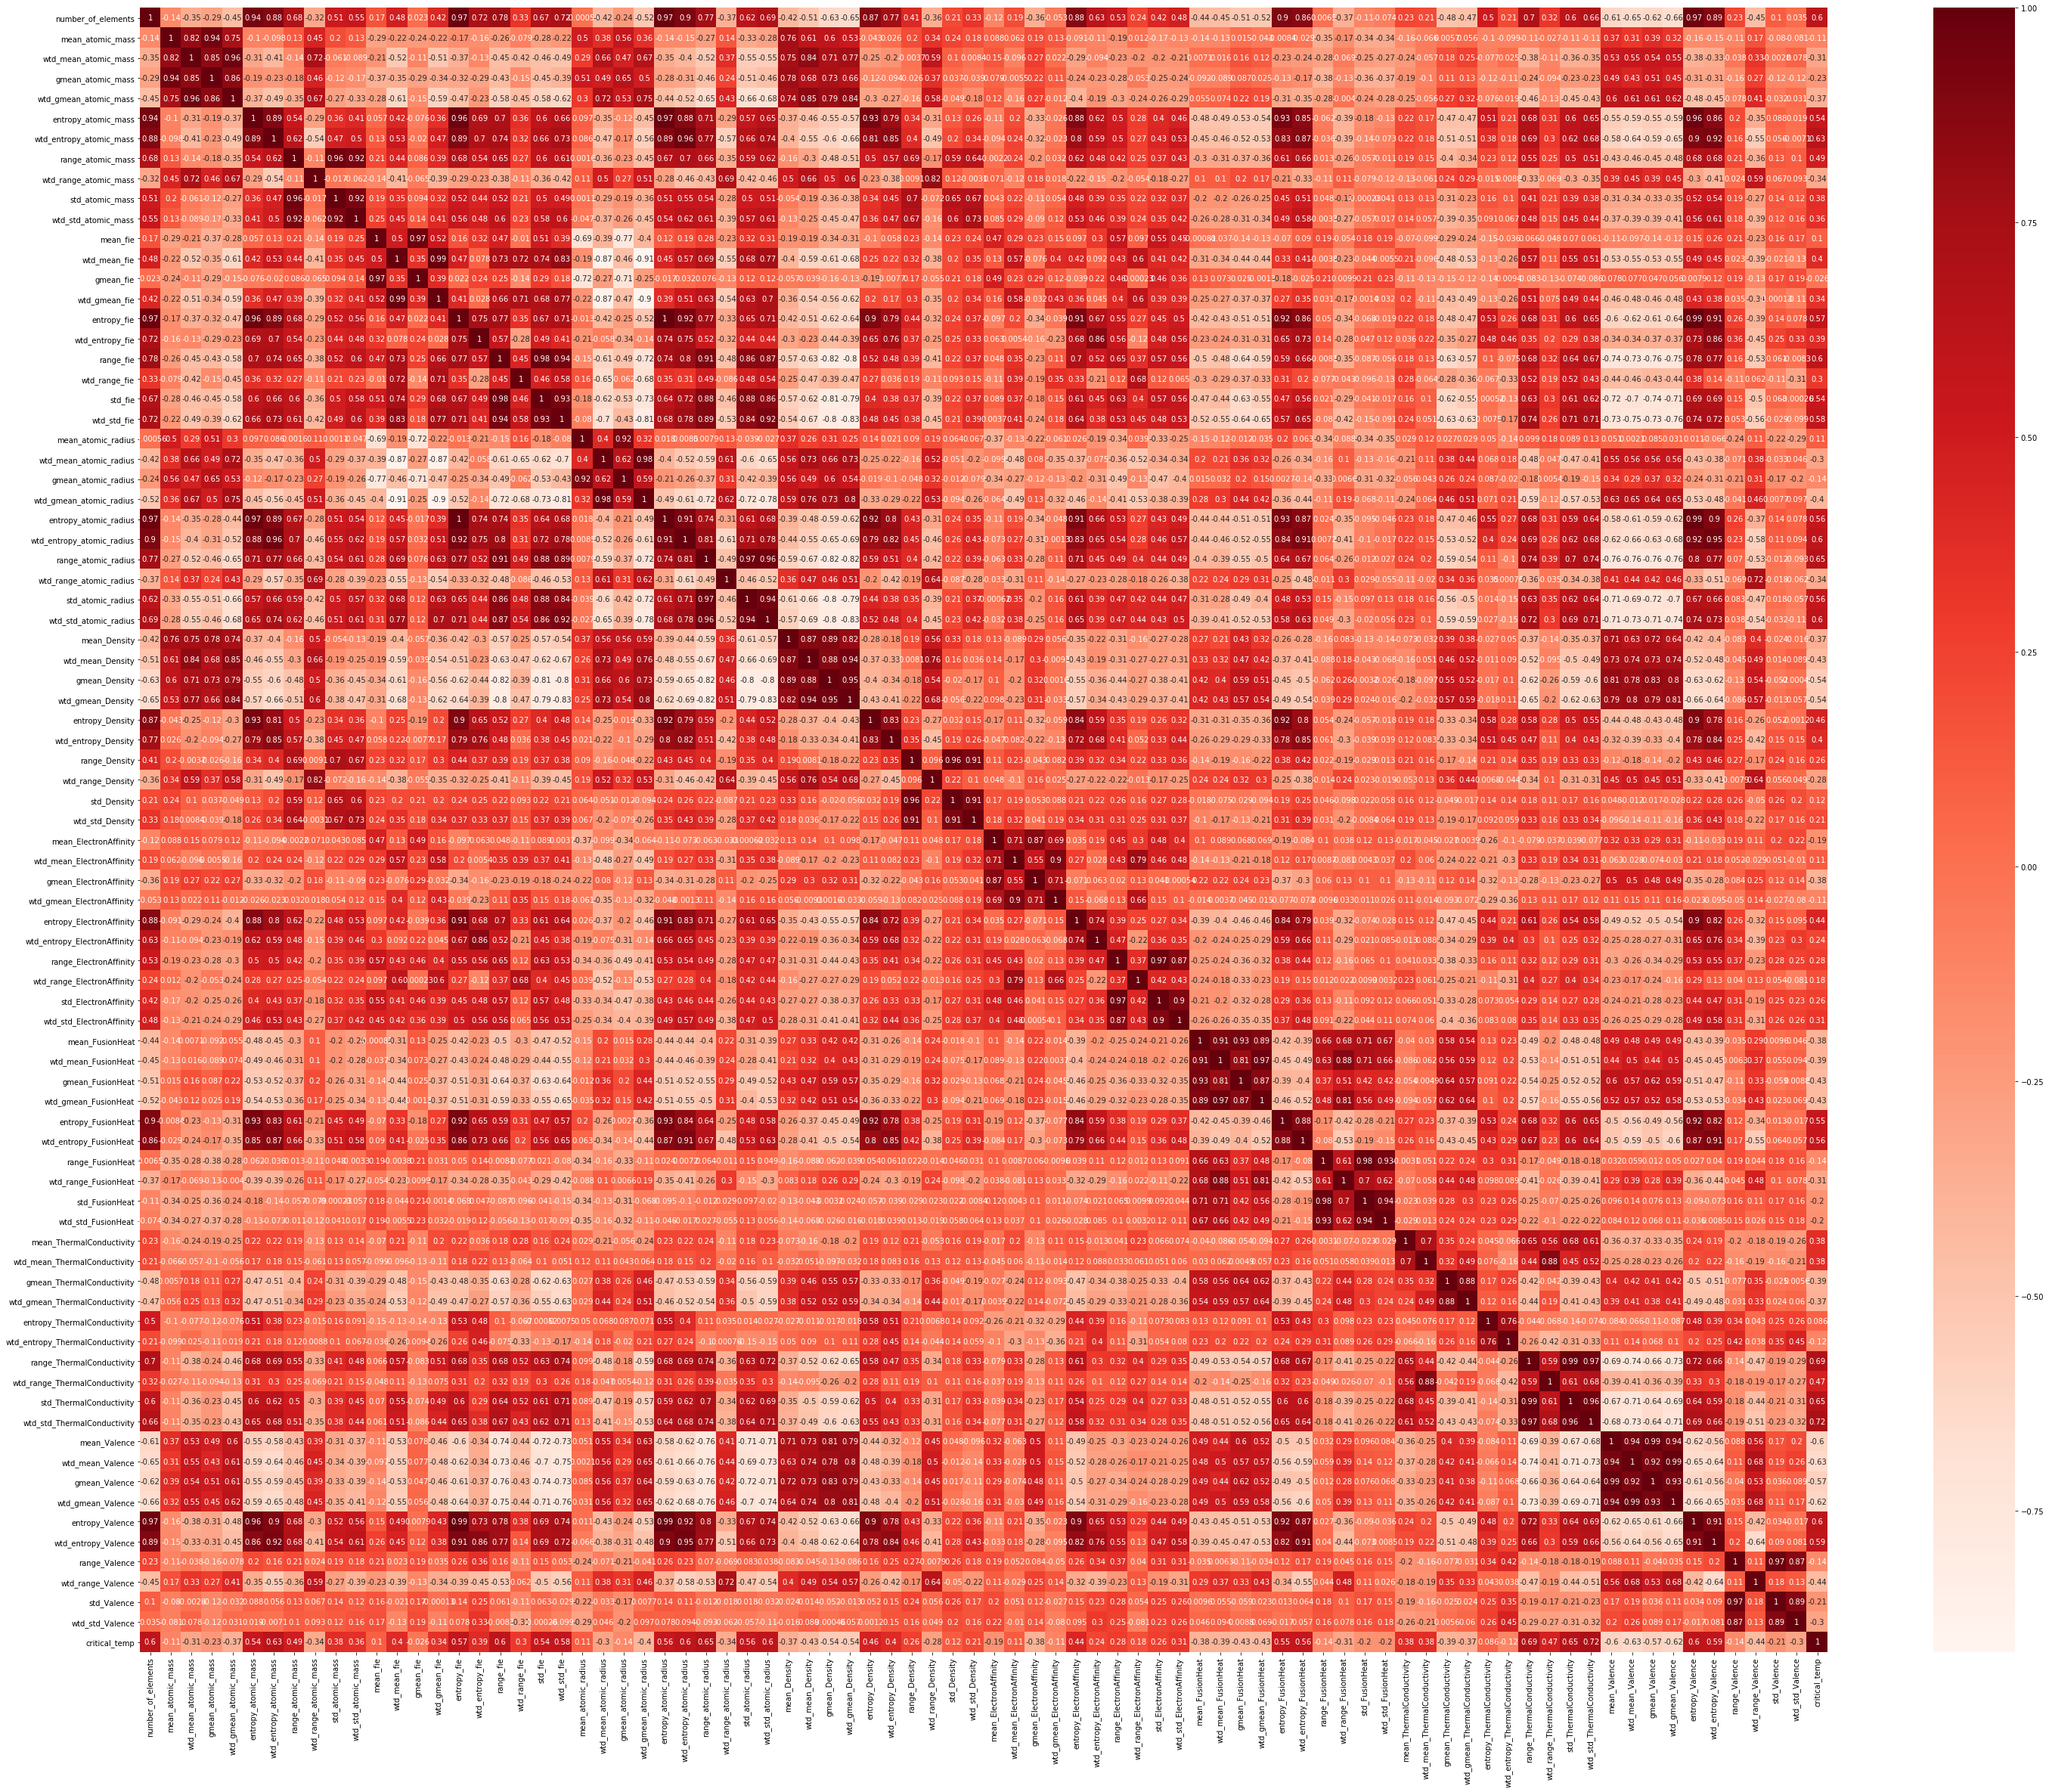

In [11]:
plt.figure(figsize=(50,40))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

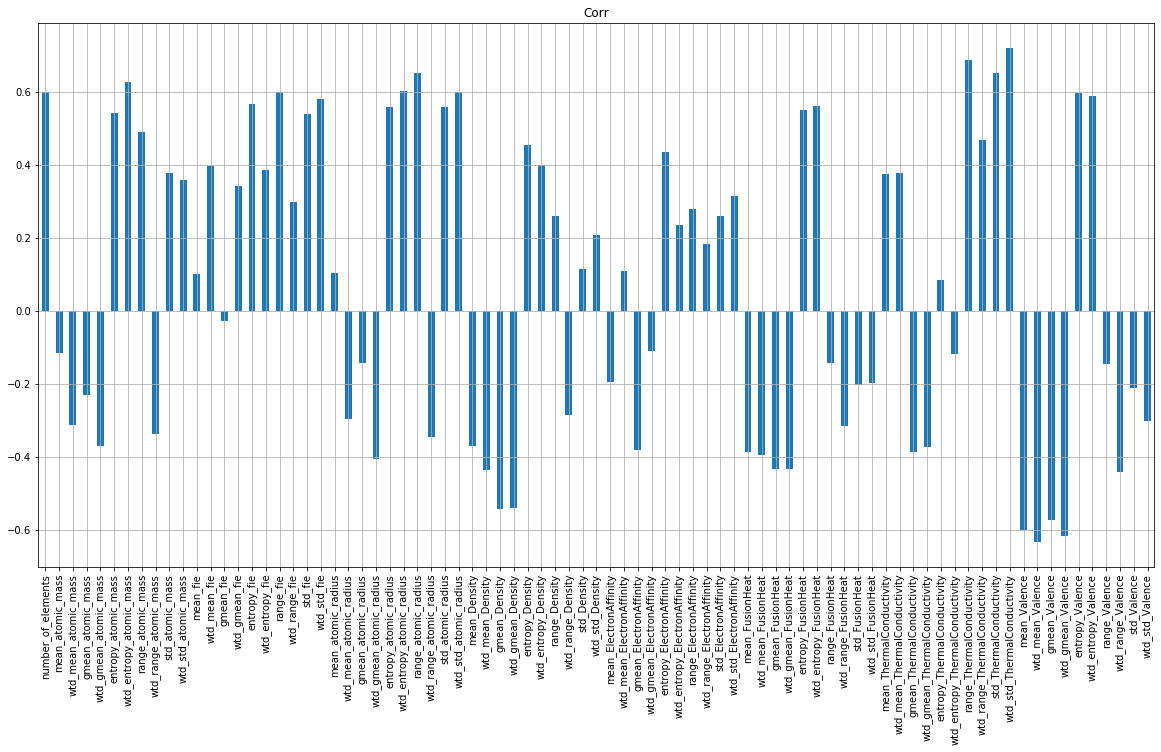

In [12]:
df_scaled.iloc[:, df_scaled.columns != 'critical_temp'].corrwith(df_scaled['critical_temp']).plot.bar(figsize= (20,10),title="Corr", fontsize=10, grid=True)

## Rimozione features non correlate con la temp crit o autocorrelate tra loro

In [13]:
#sns.set(style="ticks")
#sns.pairplot(df[["std_ThermalConductivity","range_atomic_radius","range_ThermalConductivity","wtd_std_ThermalConductivity","critical_temp"]], corner=True)

In [14]:
#corr_matrix = cor.abs()
#upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
#to_drop = [column for column in upper.columns if ( any(upper[column] > 0.90) or upper['critical_temp'][column] < 0.1 )]
#df_scaled.drop(to_drop, axis=1, inplace=True)

In [15]:
corr_matrix = cor.abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop=[]
for column in upper.columns:
    if upper['critical_temp'][column] < 0.1:
        to_drop.append(column)
    else:
        for column1 in upper.columns:
            if upper[column][column1] > 0.9:
                if upper['critical_temp'][column] > upper['critical_temp'][column1]:
                    to_drop.append(column1)
                else:
                    to_drop.append(column)
df_scaled.drop(to_drop, axis=1, inplace=True)
                
        

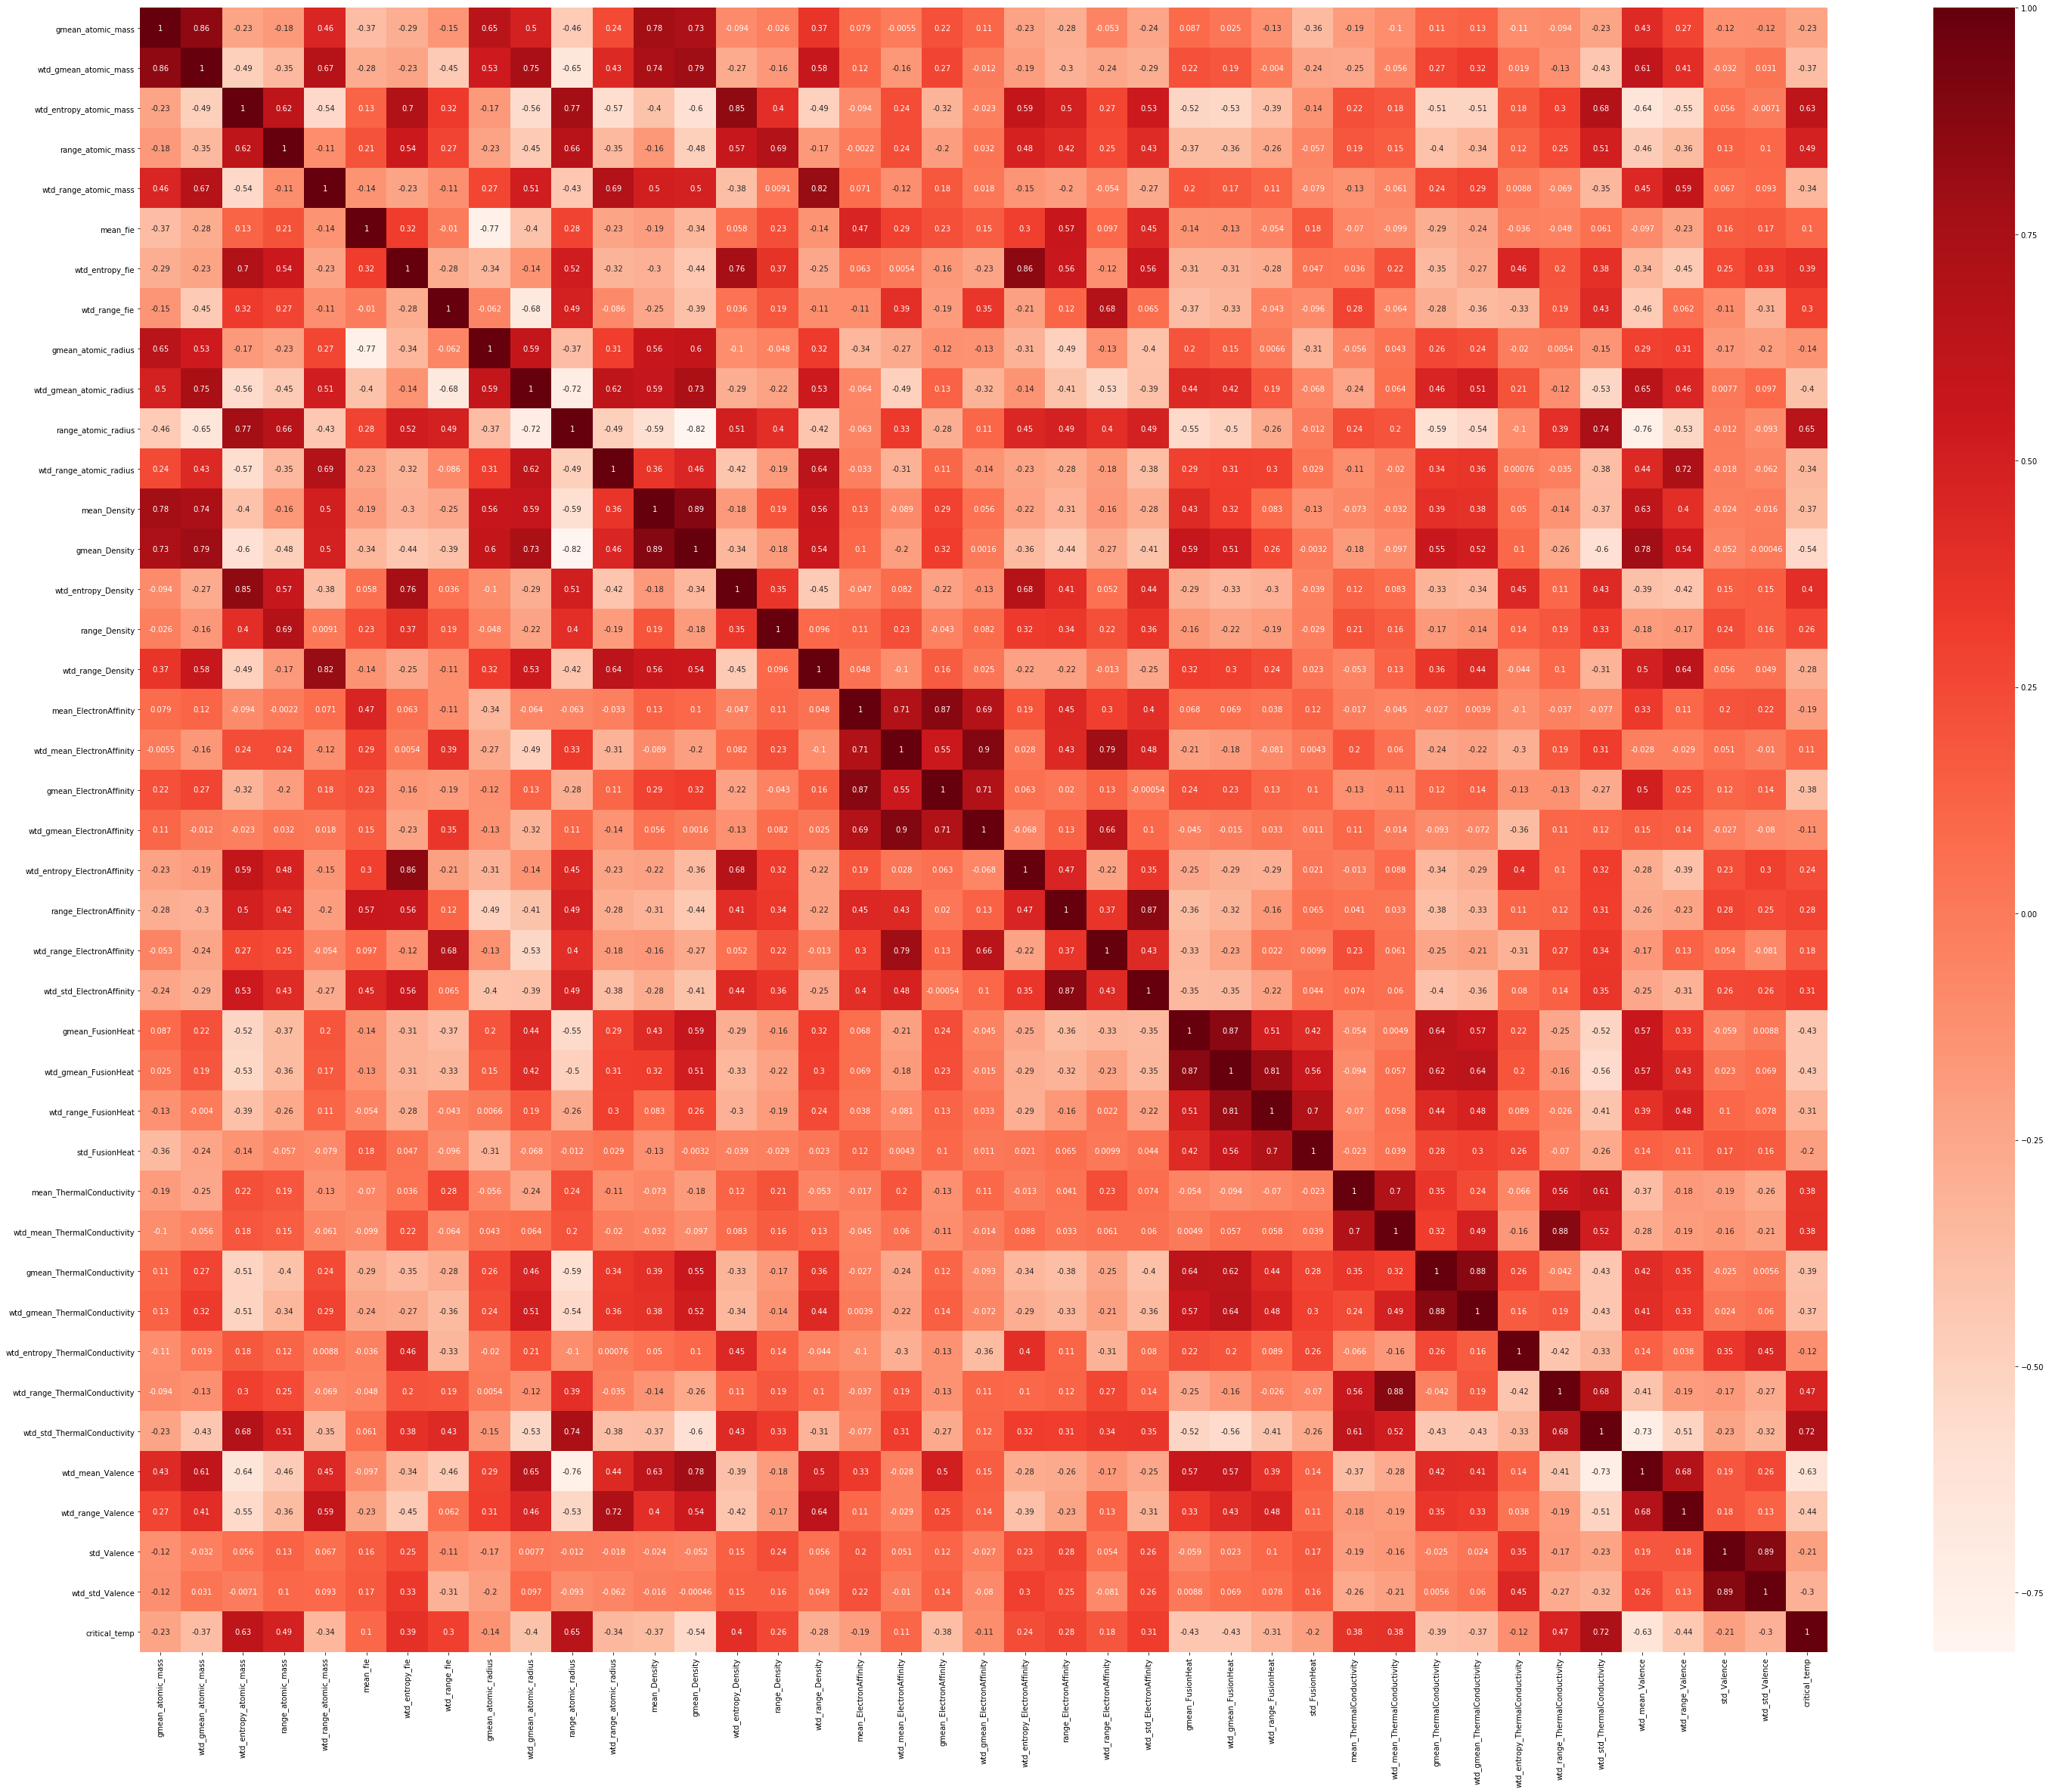

In [16]:
plt.figure(figsize=(50,40))
cor1 = df_scaled.corr()
sns.heatmap(cor1, annot=True, cmap=plt.cm.Reds)
plt.show()

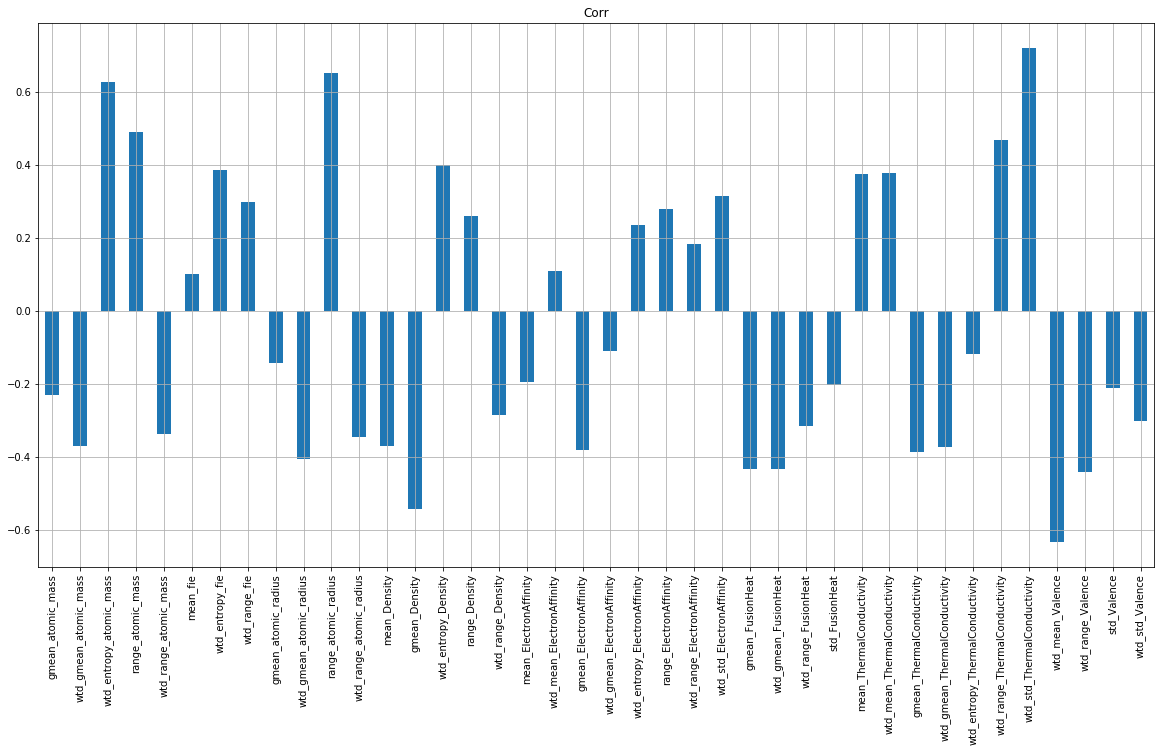

In [17]:
df_scaled.iloc[:, df_scaled.columns != 'critical_temp'].corrwith(df_scaled['critical_temp']).plot.bar(figsize= (20,10),title="Corr", fontsize=10, grid=True)

In [18]:
abs(df_scaled.iloc[:, df_scaled.columns != 'critical_temp'].corrwith(df_scaled['critical_temp'])).sort_values().tail(50)

mean_fie                           0.101401
wtd_gmean_ElectronAffinity         0.107498
wtd_mean_ElectronAffinity          0.111056
wtd_entropy_ThermalConductivity    0.116291
gmean_atomic_radius                0.142668
wtd_range_ElectronAffinity         0.184510
mean_ElectronAffinity              0.193591
std_FusionHeat                     0.201121
std_Valence                        0.208899
gmean_atomic_mass                  0.229941
wtd_entropy_ElectronAffinity       0.237045
range_Density                      0.260272
range_ElectronAffinity             0.278802
wtd_range_Density                  0.284652
wtd_range_fie                      0.299632
wtd_std_Valence                    0.300666
wtd_range_FusionHeat               0.314354
wtd_std_ElectronAffinity           0.314836
wtd_range_atomic_mass              0.337238
wtd_range_atomic_radius            0.343693
mean_Density                       0.367743
wtd_gmean_atomic_mass              0.369484
wtd_gmean_ThermalConductivity   

# Analisi globale

In [19]:
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import neighbors
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [20]:
X = df_scaled.drop('critical_temp',axis=1)
y = df_scaled['critical_temp']

In [21]:
models = {'LR':LinearRegression(),'KNN':neighbors.KNeighborsRegressor(),
         'RF':RandomForestRegressor()}

In [22]:
def model_performance(X,y,i):
    keys=[]
    mean_squared_errors = []
    R2_scores = []
    features = X.columns
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    
    for k,v in models.items():
        model = v
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        R2_scores.append(r2_score(y_test,pred))
        mean_squared_errors.append(mean_squared_error(y_test,pred))
        keys.append(k)
    table = pd.DataFrame({'model':keys, 'RMSE':mean_squared_errors,'R2 score':R2_scores})
    table['RMSE'] = table['RMSE'].apply(lambda x: np.sqrt(x))
    return table

In [23]:
model_performance(X,y,42)

model      RMSE  R2 score
0    LR  0.329152  0.694752
1   KNN  0.190014  0.898274
2    RF  0.170443  0.918150

In [24]:
RF = RandomForestRegressor()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
RF.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [25]:
y_pred_test = pd.Series(RF.predict(X_test))
y_pred_train = pd.Series(RF.predict(X_train))

rmse = round(np.sqrt(mean_squared_error(y_test,y_pred_test)),4)
r2 = round(r2_score(y_pred_test,y_test),4)

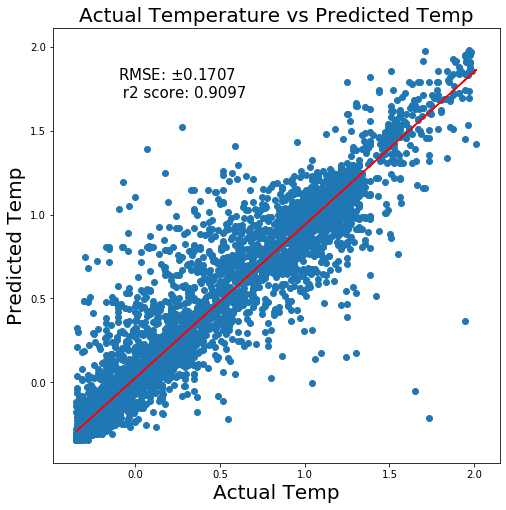

In [31]:
from scipy import stats
y_pred_test = y_pred_test.dropna()
y_pred_train = y_pred_train.dropna()
y_test = y_test.dropna()
y_train = y_train.dropna()

slope, intercept, r_value, p_value, std_err = stats.linregress(y_test,y_pred_test)
line = slope*y_test+intercept
plt.figure(figsize=(8,8))
plt.plot(y_test,line,color='red')
plt.scatter(y_test,y_pred_test)
plt.ylabel('Predicted Temp',fontsize=20)
plt.xlabel('Actual Temp',fontsize=20)
text = r'$\pm'+str(rmse)+'$'+'\n r2 score: ' +str(r2)
plt.text(-0.1,1.7,'RMSE: '+text,fontsize=15)
plt.title('Actual Temperature vs Predicted Temp',fontsize=20)
plt.show()

# Clusters

In [27]:
lista = ['critical_temp', 'wtd_std_ThermalConductivity', 'range_atomic_radius', 'wtd_mean_Valence', 'wtd_entropy_atomic_mass' ]

In [28]:
data = df_scaled[lista]

Una clusterizzazione più naturale sarebbe dividere i campioni in "lowT" e "highT", tuttavia la confusione nella distribuzione è tale per cui una separazione dei campioni ad alta T avviene creando 3 cluster. Il primo contiene i compioni a bassissima T, il secondo è un cluster di transizione e il terzo contiene i campioni ad alta T.

C:\Users\Utente\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020011DE6188>,
      dtype=object)

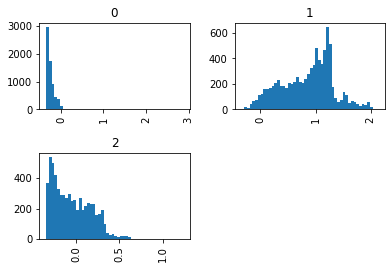

In [29]:
kmeans3 = KMeans(3)
kmeans3.fit(data)
clusters3 = kmeans3.fit_predict(data)
data['cluster3']=clusters3
data['critical_temp'].hist(by=data['cluster3'], bins= 50)

In [30]:
list1 = []
for i in [0,1,2]:
    a=data['critical_temp'][(data["cluster3"] == i)].mean()
    c=data['critical_temp'][(data["cluster3"] == i)].median()
    list1.append(a)
    list1.append(c)
    
list1

[-0.2453699376825846,
 -0.2747309961818813,
 0.8578853317580974,
 0.9432488719194725,
 -0.049331046628454424,
 -0.08677542519958348]

In [38]:
data_lowT = data[(data["cluster3"] == 0)]
data_middleT = data[(data["cluster3"] == 2)]
data_highT = data[(data["cluster3"] == 1)]

In [39]:
X_1 = data_lowT.drop('critical_temp',axis=1)
y_1 = data_lowT['critical_temp']
model_performance(X_1,y_1,42)

model      RMSE  R2 score
0    LR  0.126471  0.018636
1   KNN  0.106633  0.302355
2    RF  0.096286  0.431179

In [40]:
X_2 = data_middleT.drop('critical_temp',axis=1)
y_2 = data_middleT['critical_temp']
model_performance(X_2,y_2,42)

model      RMSE  R2 score
0    LR  0.208237  0.058107
1   KNN  0.130230  0.631610
2    RF  0.109175  0.741097

In [41]:
X_3 = data_highT.drop('critical_temp',axis=1)
y_3 = data_highT['critical_temp']
model_performance(X_3,y_3,42)

model      RMSE  R2 score
0    LR  0.454644  0.025888
1   KNN  0.323591  0.506531
2    RF  0.293120  0.595090

La clusterizzazione migliora significativamente le performance nei primi due cluster, ma la peggiora nel terzo. Questo perché i primi due cluster sono più concentrati attorno ad un valore, mentre il terzo cluster ha una distribuzione molto larga. A causa della riduzione significativa del numero di variabili predittive, il valore r2 subisce un drastico abbassamento in tutti i cluster.